# English Fake or legitimate news detection

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Loading datasets

# importing the required libraries


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import re
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
from nltk.corpus import stopwords
import pickle
from wordcloud import WordCloud, STOPWORDS


In [4]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
true_news = pd.read_csv('/content/drive/MyDrive/True.csv')
fake_news = pd.read_csv('/content/drive/MyDrive/Fake.csv')

In [6]:
#sample view
true_news.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


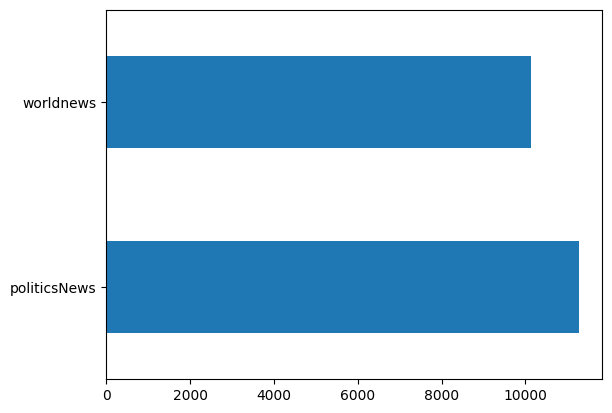

<Figure size 1000x1500 with 0 Axes>

In [7]:
true_news['subject'].value_counts().plot.barh()
plt.figure(figsize=(10,15))
plt.show()

Data is collected from two categories one is worldnews and the other one is politics news

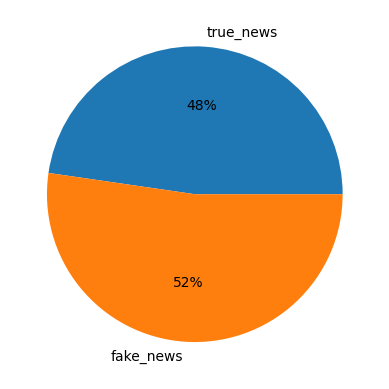

length of true news 21417
length of fake news 23481


In [8]:
true_len = len(true_news)
fake_len = len(fake_news)
x= [true_len,fake_len]
plt.pie(x, labels =['true_news','fake_news'],autopct='%1.0f%%')
plt.show()
print('length of true news',true_len)
print('length of fake news',fake_len)

Dataset is balanced

In [9]:
print(true_news.columns)
true_news.shape,fake_news.shape


Index(['title', 'text', 'subject', 'date'], dtype='object')


((21417, 4), (23481, 4))

In [10]:
#removing unnecessary columns
true_news.drop(['title','subject','date'],axis=1,inplace=True)
fake_news.drop(['title','subject','date'],axis=1,inplace=True)

In [11]:
#labelling the true and fake news data
true_news['type'] = 1  # true news is labelled as 1
fake_news['type'] = 0  # fake news is labelled as 0

In [12]:
#merging the dataframes
news_data=pd.concat([true_news,fake_news])

In [13]:
#sampling the data
news_data = news_data.sample(frac=1)

In [14]:
#saving the merged data to csv file
news_data.to_csv('true_fake_news')

In [15]:
news_data.head()

,text,type
3519,Donald Trump has been crowned 2016 Person of t...,0
21879,Yep that s correct. Your hard earned tax dolla...,0
10261,Firebrand conservative Ann Coulter exposed Del...,0
11564,Dozens of supporters of US President Donald Tr...,0
17674,GENEVA (Reuters) - West African migrants tryin...,1


In [16]:
#checking null values
news_data.isnull().sum()

text    0
type    0
dtype: int64

No null values in the data

# Text data analysis

In [ ]:
def text_preprocessing(text):
  # "this function takes the input text and preprocesses the text"
  # like removal of special characters and punctuation
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)    
    return text

In [ ]:
#applying the preprocessing function on text column
news_data["text"] = news_data["text"].apply(text_preprocessing)

In [ ]:
# seperating the features and targets
X = news_data['text']
y = news_data['type']

In [ ]:
#splitting training and testing data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [ ]:
print('length of training data',len(X_train))
print('length of text data',len(X_test))

length of training data 35918
length of text data 8980


# Vectorization of data

In [ ]:
stop_words_list = stopwords.words('english')

In [ ]:
#applying the TFIDF vectorizer
vectorization = TfidfVectorizer(stop_words=stop_words_list,ngram_range=(1,3))
x_train_vect = vectorization.fit_transform(X_train)
x_test_vect = vectorization.transform(X_test)

In [ ]:
#vocabulary
vocabulary = vectorization.vocabulary_


In [ ]:
top_5 = dict(list(vocabulary.items())[:6])
top_5

{'washington': 8837181,
 'reuters': 6777574,
 'white': 8961598,
 'house': 3668921,
 'hopeful': 3646067,
 'congress': 1646316}

# Machine learning models

###Decision Tree classifier

In [ ]:
#Training the model
dt= DecisionTreeClassifier(max_features='sqrt')
dt.fit(x_train_vect, y_train)
y_predict = dt.predict(x_test_vect)

In [ ]:
#classification report
print(classification_report(y_predict,y_test))

              precision    recall  f1-score   support

           0       0.85      0.84      0.84      4699
           1       0.83      0.83      0.83      4281

    accuracy                           0.84      8980
   macro avg       0.84      0.84      0.84      8980
weighted avg       0.84      0.84      0.84      8980



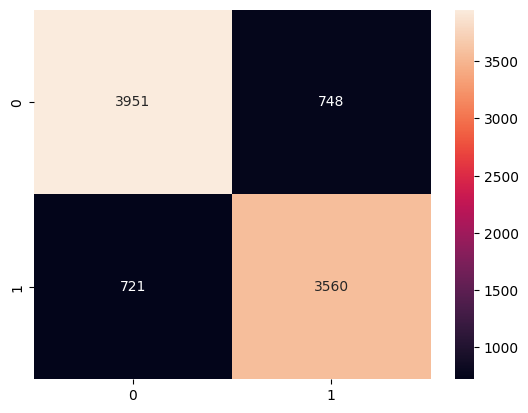

In [ ]:
#confusion matrix
cm = confusion_matrix(y_predict,y_test)
sns.heatmap(cm,annot=True,fmt='g')
plt.show()

Multinomial Niave Bayes

In [ ]:

mnb_classifier= MultinomialNB(force_alpha=True)
mnb_classifier.fit(x_train_vect, y_train)

MultinomialNB(force_alpha=True)

In [ ]:
y_predict = mnb_classifier.predict(x_test_vect)

In [ ]:
#classification report
print(classification_report(y_predict,y_test))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      4689
           1       0.96      0.97      0.96      4291

    accuracy                           0.97      8980
   macro avg       0.97      0.97      0.97      8980
weighted avg       0.97      0.97      0.97      8980



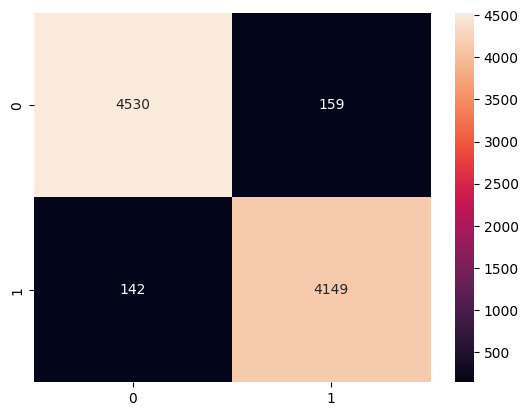

In [ ]:
cm = confusion_matrix(y_predict,y_test)
sns.heatmap(cm,annot=True,fmt='g')
plt.show()

# Best model saving

In [ ]:
with open('/content/drive/MyDrive/saved_model/dtree_model','wb') as f:  #saving decision tree model
  pickle.dump(dt,f)

with open('/content/drive/MyDrive/saved_model/mulinomial','wb') as f:   #saving svm model
  pickle.dump(mnb_classifier,f)

with open('/content/drive/MyDrive/saved_model/tfidf_vect', 'wb') as f:  #saving the vectorizer
   pickle.dump(vectorization, f)

In [ ]:
#loading the model

with open('/content/dtree_model','rb') as f:  #loading decision tree model
  dt_saved_model = pickle.load(f)

with open('/content/mulinomial','rb') as f:   #loading svm model
  mnb_saved_model = pickle.load(f)

with open('/content/tfidf_vect','rb') as f:   #loading vectorizer
  tfidf_vectorizer = pickle.load(f)

# Word cloud

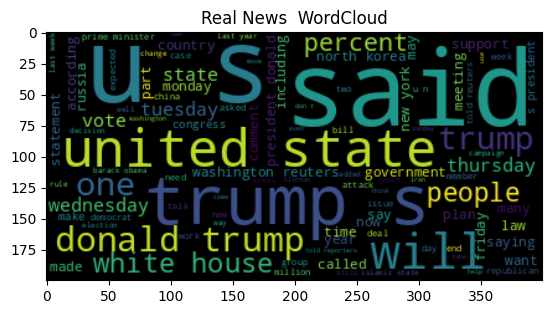

In [ ]:
#word cloud for true news
plt.figure()
wc= WordCloud(max_words=100, stopwords= STOPWORDS).generate(" ".join(news_data[news_data['type']==1]['text']))
plt.title('Real News  WordCloud')
plt.imshow(wc, interpolation='bilinear')
plt.show()

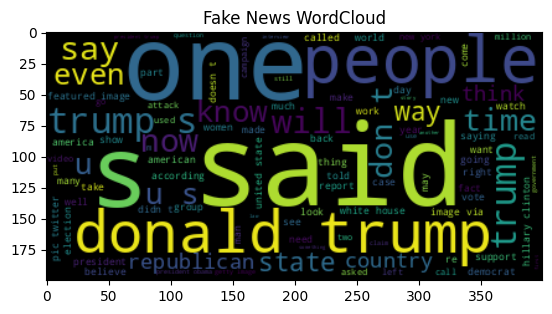

In [ ]:
#word cloud for fake news
plt.figure()
wc= WordCloud(max_words=100, stopwords= STOPWORDS).generate(" ".join(news_data[news_data['type']==0]['text']))
plt.title('Fake News WordCloud')
plt.imshow(wc, interpolation='bilinear')
plt.show()

# Test cases

In [ ]:
true_news.text.values[:1]

array(['WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBS’ “Face the Nation,” drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress. President Donald Trump and his Republicans want a big budget increase in military spending, while Democrats also want proportional increases for non-defense “discretionary” spending on programs that support

In [ ]:
input_text_t = 'WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBS’ “Face the Nation,” drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress. President Donald Trump and his Republicans want a big budget increase in military spending, while Democrats also want proportional increases for non-defense “discretionary” spending on programs that support education, scientific research, infrastructure, public health and environmental protection. “The (Trump) administration has already been willing to say: ‘We’re going to increase non-defense discretionary spending ... by about 7 percent,’” Meadows, chairman of the small but influential House Freedom Caucus, said on the program. “Now, Democrats are saying that’s not enough, we need to give the government a pay raise of 10 to 11 percent. For a fiscal conservative, I don’t see where the rationale is. ... Eventually you run out of other people’s money,” he said. Meadows was among Republicans who voted in late December for their party’s debt-financed tax overhaul, which is expected to balloon the federal budget deficit and add about $1.5 trillion over 10 years to the $20 trillion national debt. “It’s interesting to hear Mark talk about fiscal responsibility,” Democratic U.S. Representative Joseph Crowley said on CBS. Crowley said the Republican tax bill would require the  United States to borrow $1.5 trillion, to be paid off by future generations, to finance tax cuts for corporations and the rich. “This is one of the least ... fiscally responsible bills we’ve ever seen passed in the history of the House of Representatives. I think we’re going to be paying for this for many, many years to come,” Crowley said. Republicans insist the tax package, the biggest U.S. tax overhaul in more than 30 years,  will boost the economy and job growth. House Speaker Paul Ryan, who also supported the tax bill, recently went further than Meadows, making clear in a radio interview that welfare or “entitlement reform,” as the party often calls it, would be a top Republican priority in 2018. In Republican parlance, “entitlement” programs mean food stamps, housing assistance, Medicare and Medicaid health insurance for the elderly, poor and disabled, as well as other programs created by Washington to assist the needy. Democrats seized on Ryan’s early December remarks, saying they showed Republicans would try to pay for their tax overhaul by seeking spending cuts for social programs. But the goals of House Republicans may have to take a back seat to the Senate, where the votes of some Democrats will be needed to approve a budget and prevent a government shutdown. Democrats will use their leverage in the Senate, which Republicans narrowly control, to defend both discretionary non-defense programs and social spending, while tackling the issue of the “Dreamers,” people brought illegally to the country as children. Trump in September put a March 2018 expiration date on the Deferred Action for Childhood Arrivals, or DACA, program, which protects the young immigrants from deportation and provides them with work permits. The president has said in recent Twitter messages he wants funding for his proposed Mexican border wall and other immigration law changes in exchange for agreeing to help the Dreamers. Representative Debbie Dingell told CBS she did not favor linking that issue to other policy objectives, such as wall funding. “We need to do DACA clean,” she said.  On Wednesday, Trump aides will meet with congressional leaders to discuss those issues. That will be followed by a weekend of strategy sessions for Trump and Republican leaders on Jan. 6 and 7, the White House said. Trump was also scheduled to meet on Sunday with Florida Republican Governor Rick Scott, who wants more emergency aid. The House has passed an $81 billion aid package after hurricanes in Florida, Texas and Puerto Rico, and wildfires in California. The package far exceeded the $44 billion requested by the Trump administration. The Senate has not yet voted on the aid'

input_text_f = str(fake_news.text.values[:1])
input_text_f = str(fake_news.text.values[5])
input_text_t = str(true_news.text.values[5])
input_text_t = str(true_news.text.values[10])



In [ ]:
def text_preprocessing(text):
  # "this function takes the input text and preprocesses the text"
  # like removal of special characters and punctuation
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)    
    return text

In [ ]:
processed_input = text_preprocessing(input_text_t)
# processed_input = text_preprocessing(input_text_f)
result = mnb_saved_model.predict(tfidf_vectorizer.transform([processed_input]))
result

array([1])

In [ ]:
if result == 0:
  print('FAKE NEWS!!!')
else:
  print('TRUE NEWS:)')

TRUE NEWS:)
